In [1]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import h5py

DATA_PATH = "/home/giovanni/pod/thesis/code/scripts-sources/W3Pi-selection-algorithm/data/"

In [46]:
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_PU200.root") as f:
    tree = f.get("Events")
    print(tree.keys())

    branches = tree.arrays()
    genPi_etas = branches["GenPi_eta"].to_numpy()
    genPi_pts = branches["GenPi_pt"].to_numpy()
    Puppi_pdgId = branches["Puppi_pdgId"]
    genPi_idx = branches["Puppi_GenPiIdx"]
    print(genPi_idx[4].tolist())
    

['run', 'luminosityBlock', 'event', 'bunchCrossing', 'orbitNumber', 'nEle', 'Ele_hwEta', 'Ele_hwPhi', 'Ele_hwPt', 'Ele_hwQual', 'Ele_quality', 'Ele_eta', 'Ele_idScore', 'Ele_mass', 'Ele_phi', 'Ele_pt', 'Ele_puppiIsol', 'Ele_puppiIsolPV', 'Ele_trkIsol', 'Ele_trkIsolPV', 'Ele_z0', 'nGenEle', 'GenEle_isFromTau', 'GenEle_isPrompt', 'GenEle_motherId', 'GenEle_dxy', 'GenEle_eta', 'GenEle_mass', 'GenEle_phi', 'GenEle_pt', 'GenEle_z0', 'nGenJet', 'GenJet_eta', 'GenJet_mass', 'GenJet_phi', 'GenJet_pt', 'nGenPho', 'GenPho_isFromTau', 'GenPho_isPrompt', 'GenPho_motherId', 'GenPho_dxy', 'GenPho_eta', 'GenPho_mass', 'GenPho_phi', 'GenPho_pt', 'GenPho_z0', 'nGenPi', 'GenPi_charge', 'GenPi_pdgId', 'GenPi_prompt', 'GenPi_eta', 'GenPi_mass', 'GenPi_phi', 'GenPi_pt', 'GenPi_z0', 'GenVtx_x', 'GenVtx_y', 'GenVtx_z', 'nGenW', 'GenW_charge', 'GenW_pdgId', 'GenW_eta', 'GenW_mass', 'GenW_phi', 'GenW_pt', 'GenW_z0', 'nL1Vtx', 'L1Vtx_sumpt', 'L1Vtx_z', 'nPho', 'Pho_hwEta', 'Pho_hwPhi', 'Pho_hwPt', 'Pho_hwQual',

In [3]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue

        counter += 1

print(counter)

10389


In [24]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue

        counter += 1

print(counter)

8915


In [51]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1:
            continue

        if grp.attrs["is_gm"] != 1:
            counter += 1

print(counter)

10038


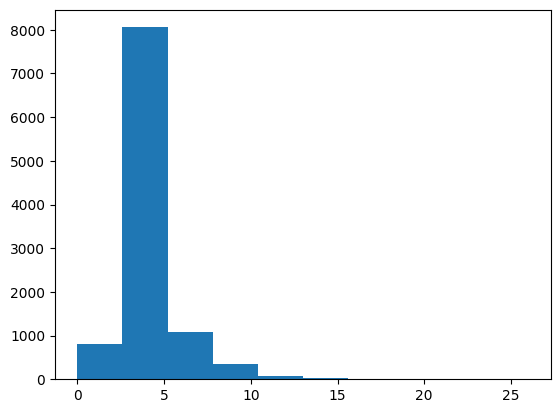

In [57]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

histo = []

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue
        
        pts = grp["pt"][...]
        histo.append(len(pts[pts >= 7]))

plt.hist(histo);

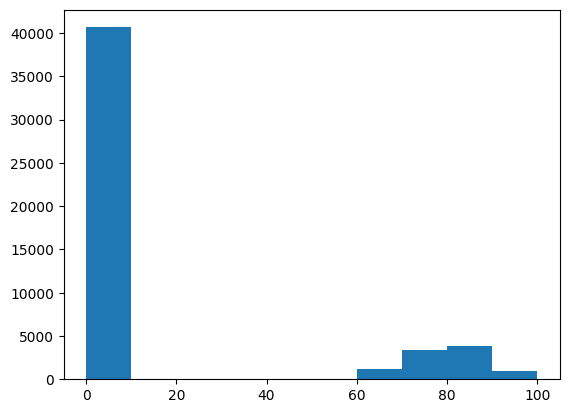

In [26]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200_reco.hdf5"

mass_array = []

with h5py.File(file, "r") as f:
    for _, grp in f.items():
        if grp["reco_w_mass"]:
            mass_array.append(grp["reco_w_mass"][...])


plt.hist(mass_array);


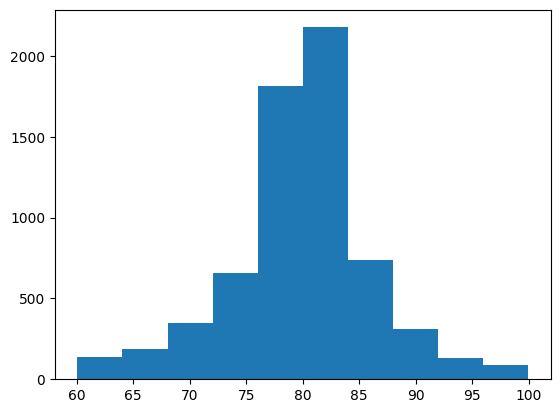

In [27]:
file_gm = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"
file_reco = DATA_PATH + "l1Nano_WTo3Pion_PU200_reco.hdf5"

mass_array = []

with h5py.File(file_gm, "r") as f_gm:
    with h5py.File(file_reco, "r") as f_reco:
        for (grp_name_gm, grp_gm), (grp_name_reco, grp_reco) in zip(f_gm.items(), f_reco.items()):
            gm_triplet_idxs = grp_gm.attrs["gm_triplet_idxs"]
            reco_triplet_idxs = grp_reco["reco_triplet_idxs"]
            reco_right = np.allclose(np.sort(gm_triplet_idxs), np.sort(reco_triplet_idxs))

            if reco_right:
                mass_array.append(grp_reco["reco_w_mass"][...])

plt.hist(mass_array);

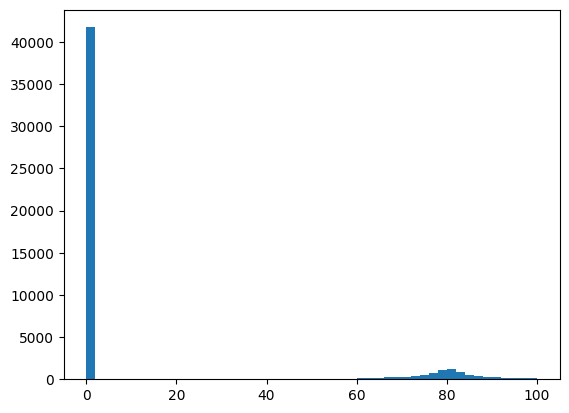

In [29]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1_reco.hdf5"

mass_array = []

with h5py.File(file, "r") as f:
    for _, grp in f.items():
        if grp["reco_w_mass"]:
            mass_array.append(grp["reco_w_mass"][...])


plt.hist(mass_array, bins=50);


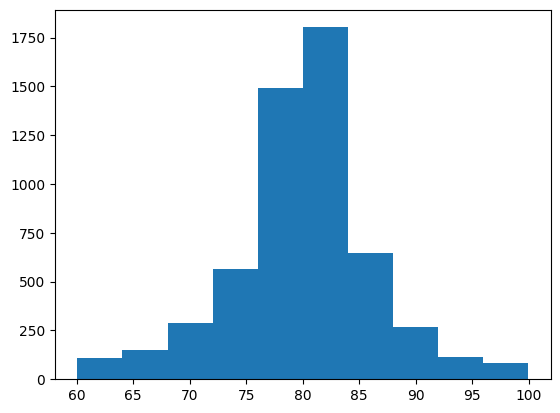

In [28]:
file_gm = DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1.hdf5"
file_reco = DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1_reco.hdf55"

mass_array = []

with h5py.File(file_gm, "r") as f_gm:
    with h5py.File(file_reco, "r") as f_reco:
        for (grp_name_gm, grp_gm), (grp_name_reco, grp_reco) in zip(f_gm.items(), f_reco.items()):
            gm_triplet_idxs = grp_gm.attrs["gm_triplet_idxs"]
            reco_triplet_idxs = grp_reco["reco_triplet_idxs"]
            reco_right = np.allclose(np.sort(gm_triplet_idxs), np.sort(reco_triplet_idxs))

            if reco_right:
                mass_array.append(grp_reco["reco_w_mass"][...])

plt.hist(mass_array);

In [9]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200_reco_v2.hdf5"

mass_array = []

with h5py.File(file, "r") as f:
    grp = f["1034"]
    print(grp["reco_triplet_idxs"][...])
    print(grp["reco_w_mass"][...])

[ 2 10 16]
0.0


In [22]:
rename_map = {
    "L1Puppi_pt": "Puppi_pt",
    "L1Puppi_eta": "Puppi_eta",
    "L1Puppi_phi": "Puppi_phi",
    "L1Puppi_pdgId": "Puppi_pdgId",
    "L1Puppi_GenPiIdx": "Puppi_GenPiIdx",
    "nL1Puppi": "nPuppi",
}

# Open the original file and TTree
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v0.root") as f_in:
    tree = f_in.get("Events")

    # Convert the TTree to an awkward array
    array = tree.arrays(library="ak")

    # Rename branches
    for old_name, new_name in rename_map.items():
        if old_name in array.fields:
            array[new_name] = array[old_name]  # Add the renamed branch
            del array[old_name]               # Remove the old branch

    # Write the new array to a new ROOT file
    out_tree = {}
    with uproot.recreate(DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1.root") as f_out:
        for key in array.fields:
            out_tree[key] = array[key]

        f_out["Events"] = out_tree